# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [11]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\\USER\\Documents\\GitHub\\2nd-ML100Days\\data\\Part01'

In [12]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [13]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [16]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [22]:
corr=app_train.corr()['TARGET'].drop('TARGET',axis=0).sort_values()

corr_minmax = pd.concat([corr.head(15),corr.tail(15)])
print(corr_minmax)

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED_ANOM            -0.045987
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457


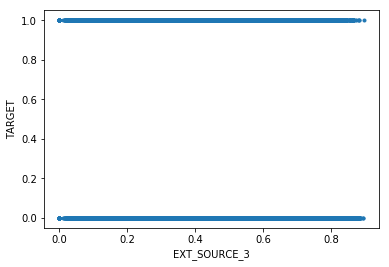

In [25]:
plt.plot(app_train['EXT_SOURCE_3'],app_train['TARGET'],'.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

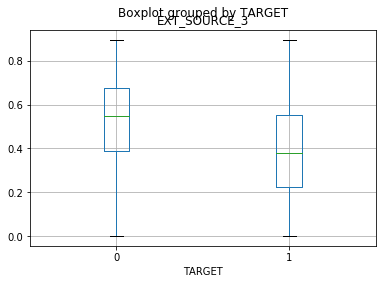

In [26]:
app_train.boxplot(column='EXT_SOURCE_3',by='TARGET')
plt.show() #corr smallest

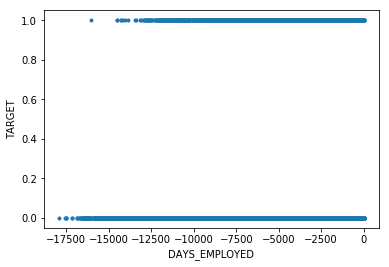

In [27]:
plt.plot(app_train['DAYS_EMPLOYED'],app_train['TARGET'],'.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET')
plt.show()

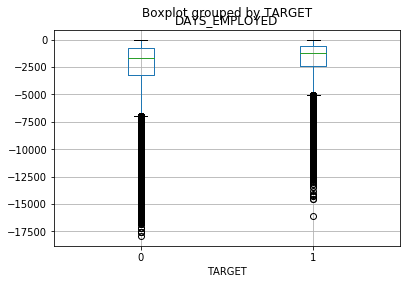

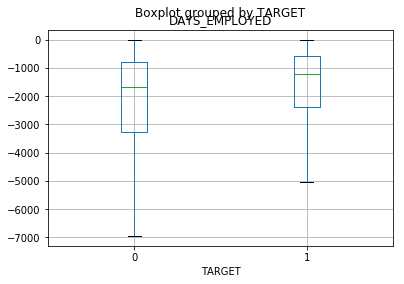

In [37]:
app_train.boxplot(column='DAYS_EMPLOYED',by='TARGET')
plt.show() # corr largest
#這些黑色的圈是 outlier 唷，也就是數值超越了 boxplot 的上下界 (Q1-1.5IQR, Q3+1.5IQR)
#如果你想要把那些 outlier disable 掉，你可以在 plt.boxplot 中，加上 sym="" 試看看
app_train.boxplot(column='DAYS_EMPLOYED',by='TARGET',sym="")
plt.show()

In [53]:
from scipy import stats
#stats.pointbiserialr(a, b)
#there's NAN ,need to do something,to be fixed....

print(stats.pointbiserialr(app_train['TARGET'],app_train['DAYS_EMPLOYED']))
print(stats.pointbiserialr(app_train['TARGET'],app_train['EXT_SOURCE_3']))

PointbiserialrResult(correlation=nan, pvalue=1.0)
PointbiserialrResult(correlation=nan, pvalue=1.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


0         -637.000000
1        -1188.000000
2         -225.000000
3        -3039.000000
4        -3038.000000
5        -1588.000000
6        -3130.000000
7         -449.000000
8                 NaN
9        -2019.000000
10        -679.000000
11                NaN
12       -2717.000000
13       -3028.000000
14        -203.000000
15       -1157.000000
16       -1317.000000
17        -191.000000
18       -7804.000000
19       -2038.000000
20       -4286.000000
21       -1652.000000
22       -4306.000000
23                NaN
24        -746.000000
25       -3494.000000
26       -2628.000000
27       -1234.000000
28       -1796.000000
29       -1010.000000
             ...     
307481       0.511892
307482       0.394495
307483       0.520898
307484            NaN
307485       0.865896
307486       0.199771
307487       0.255332
307488       0.529890
307489       0.397946
307490       0.495666
307491       0.716570
307492       0.365617
307493       0.728141
307494       0.511892
307495    